In [16]:
from __future__ import division

In [17]:
%matplotlib inline
%autoreload 2

In [18]:
import matplotlib.pyplot as plt 

In [19]:
import sys
sys.path.append("../")

In [20]:
import get_gal_centroids as get_gal
from compare_peak_methods import draw_gaussian
from plot_gal_prop import plot_cf_contour
import compare_peak_methods as compare
from compare_peak_methods import one_big_gaussian_one_small_gaussian as \
    bimodal_gaussian

In [21]:
from get_gal_centroids import shrinking_apert 

# compare the confidence regions of different methods

In [40]:
bootNo = 100
data_size = 50

In [41]:
gauss_data, shrink_peak_dens, KDE_peak_dens, cent_peak_dens = \
    compare.call_gaussian_and_prepare_data(data_size=data_size, bootNo=bootNo)

saving figure to../../paper/figures/drafts/gauss.pdf


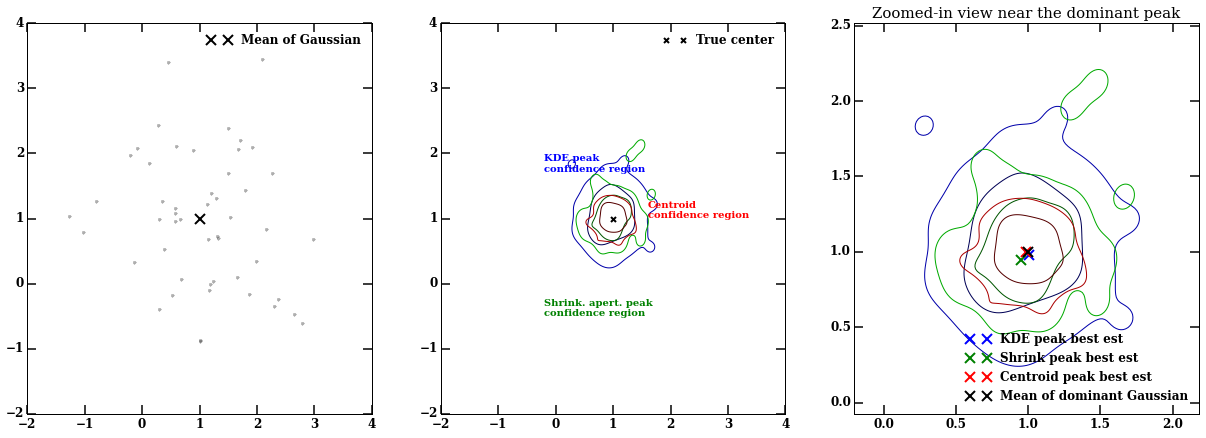

In [48]:
compare.plot_gauss_comparison(gauss_data, shrink_peak_dens, KDE_peak_dens,
                              cent_peak_dens, save=True)

# Test 2 - one big gaussian, one small close-by gaussian

In [43]:
bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1 = \
    compare.call_one_big_one_small_gaussian(data_size=data_size, bootNo=bootNo)

saving figure to../../paper/figures/drafts/confidence_regions_bimodal.pdf


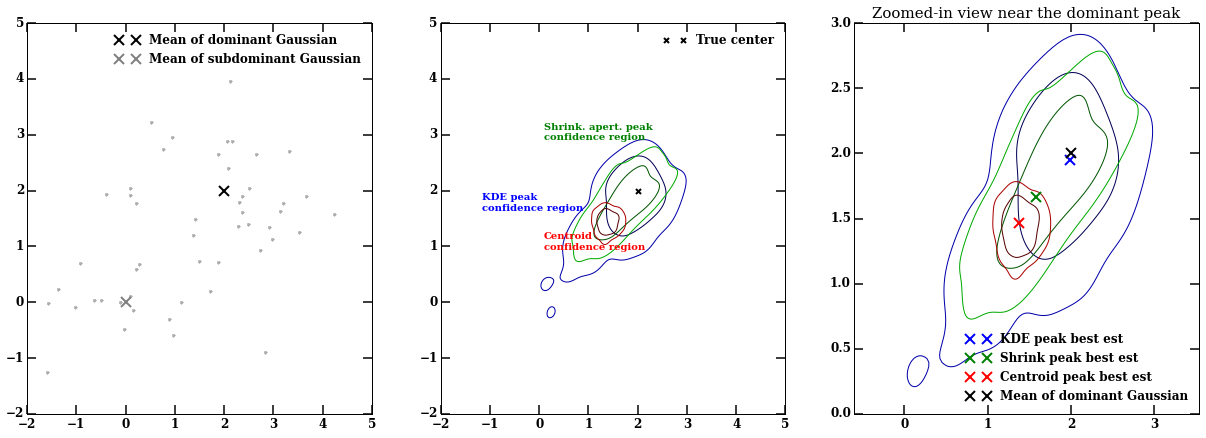

In [47]:
compare.plot_one_big_one_small_gaussian(
    bimodal_data, shrink_peak1, KDE_peak_dens1, cent_peak_dens1, save=True)

# Test 3 - dumbbell data 

In [45]:
dumb_data, shrink_peak_dens2, KDE_peak_dens2, KDE_peak_dens2b, cent_peak_dens2 = \
    compare.call_dumbbell_example_and_prepare_data(data_size=data_size, bootNo=bootNo)

saving figure to../../paper/figures/drafts/confidence_regions_dumbbell.pdf


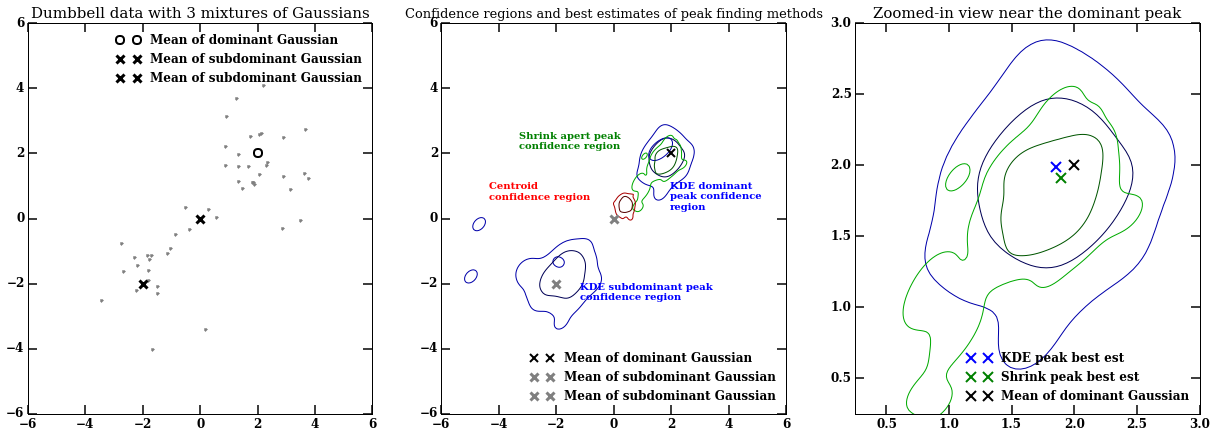

In [50]:
compare.plot_dumbbell_comparison(
    dumb_data, shrink_peak_dens2, KDE_peak_dens2, 
    KDE_peak_dens2b, cent_peak_dens2, save=True)